# 1. Crecimiento de la bacteria _V. natriegens_ en medio de cultivo con pH de 7.85

En algún experimento se recopilarón los siguientes datos del crecimiento de la población de bacterias.
Donde "Índice de Tiempo" se refiere a intervalos de 16 minutos.

| Tiempo (minutos) | Índice de Tiempo | Densidad de Población |
|------------------|------------------|-----------------------|
| 0                | 0                | 0.028                 |
| 16               | 1                | 0.047                 |
| 32               | 2                | 0.082                 |
| 48               | 3                | 0.141                 |
| 64               | 4                | 0.240                 |
| 80               | 5                | 0.381                 |

### $\mathrm{i}$) Repitase el análisis de datos visto en clases para esta tabla.

#### Notación
Usamos $t$ para denotar el intervalo de tiempo de 16 minutos en que se mide la densidad de población $B_t$; dónde $B_t$ se mide al inicio del intervalo y $t=0$ es el primer intervalo. Así $B_t$ ha sido medido a los $t\times 16$ minutos. Usamos $\Delta$ para asociar el símbolo $\Delta X_y$ con $X_{y+1}-X_y$ por igualdad.

#### Gráficas
Buscamos una relación entre los datos para obtener una ecuación dinámica de la que posiblemente conozcamos una solución y modele el fenomeno con precisión. Encontrar la ecuación de una recta es sencillo, por lo que aplicando transformaciones a los datos esperamos encontrar una relación lineal.

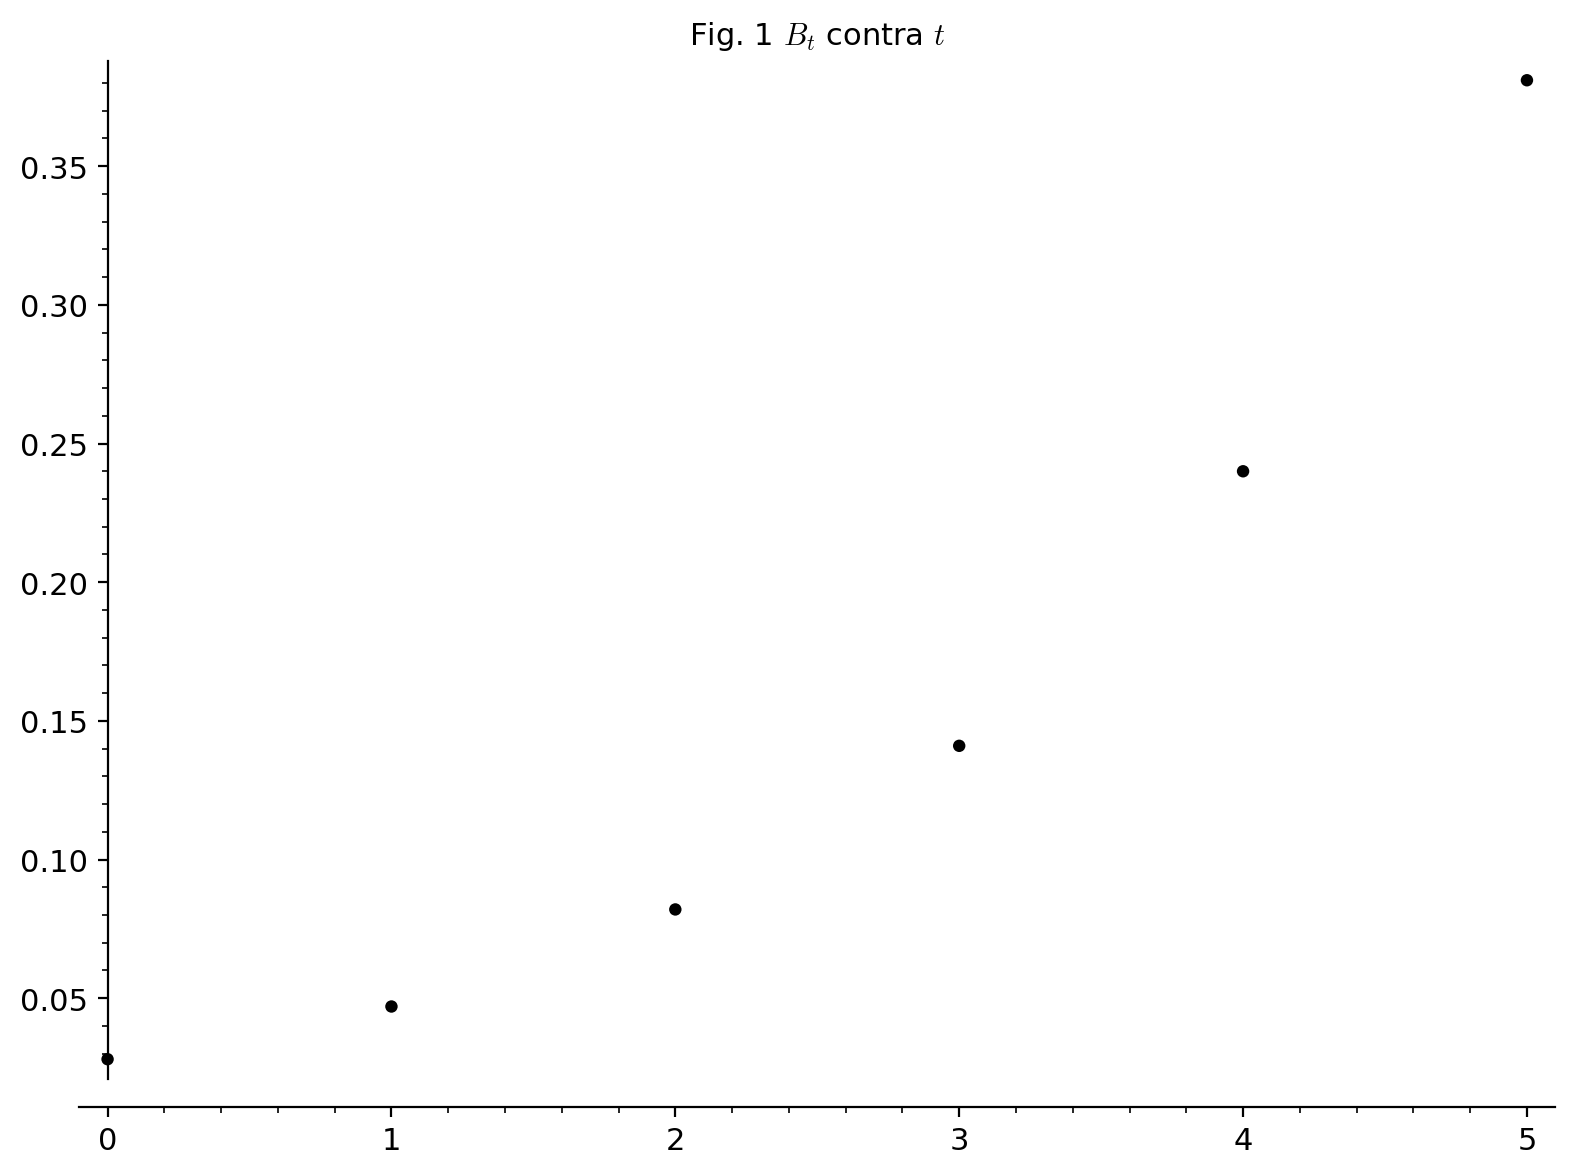

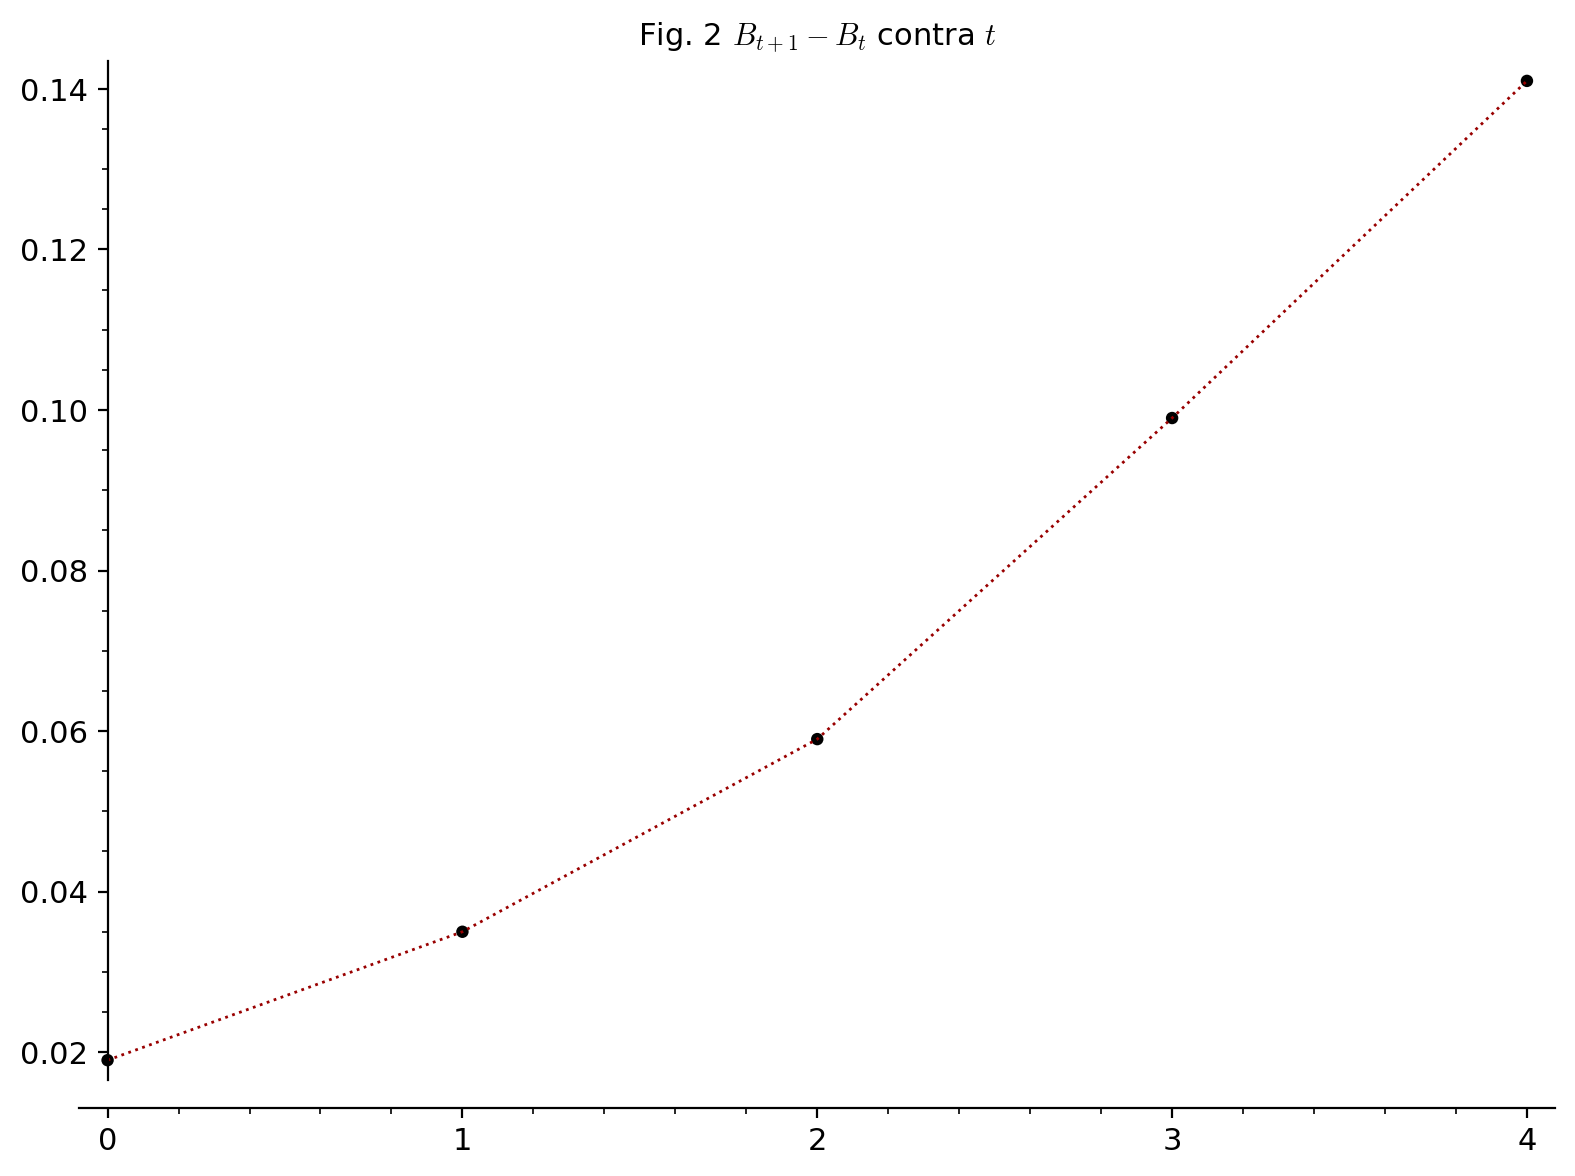

In [728]:
# !! Variables Globales: Tabla1, Tabla2
def MostrarGraficaTabla(tabla, nombre=None, ticks=None, figsize=8, fontsize=11, label=None, dotted=False,
                       pointsize=20):
    G = points(tabla, rgbcolor=(0,0,0), pointsize=pointsize, legend_label=label)
    if dotted:
        G += list_plot(tabla, plotjoined=True, linestyle=":", rgbcolor=(0.6,0,0))
    show(G, title=nombre, ticks=ticks,
                figsize=figsize, fontsize=fontsize, dpi=200)
    
def GraficaTabla(tabla, nombre=None, ticks=None, figsize=8, fontsize=11, label=None, dotted=False,
                pointsize=20):
    G = points(tabla, rgbcolor=(0,0,0), pointsize=pointsize, legend_label=label)
    if dotted:
        G += list_plot(tabla, plotjoined=True, linestyle=":", rgbcolor=(0.6,0,0))
    return plot(G)
    
Tabla1 = [(0, 0.028),
        (1, 0.047),
        (2, 0.082),
        (3, 0.141),
        (4, 0.240),
        (5, 0.381)]

Tabla2 = list()
for t in range(5):
    Tabla2.append( (t, Tabla1[t+1][1]-Tabla1[t][1]) ) # <- aumento B_{t+1}-B_t
    
MostrarGraficaTabla(Tabla1, nombre="Fig. 1 $B_t$ contra $t$", ticks = [1,None])
MostrarGraficaTabla(Tabla2, nombre="Fig. 2 $B_{t+1}-B_t$ contra $t$", ticks = [1,None], dotted = True)

Se observa de la figura 1 que cada vez está más separado un valor de otro, con lo que el crecimiento se hace cada vez mayor. Pero de la figura 2 se observa que el crecimiento $B_{t+1}-B_t$ tampoco es lineal sobre el tiempo.  

Como $B_t$ también aumenta con el tiempo, se piensa que podría relacionarse mejor (linealmente) con $B_{t+1}-B_{t}$ que $t$. Dado que ambas son cantidades que aumentan con el tiempo.

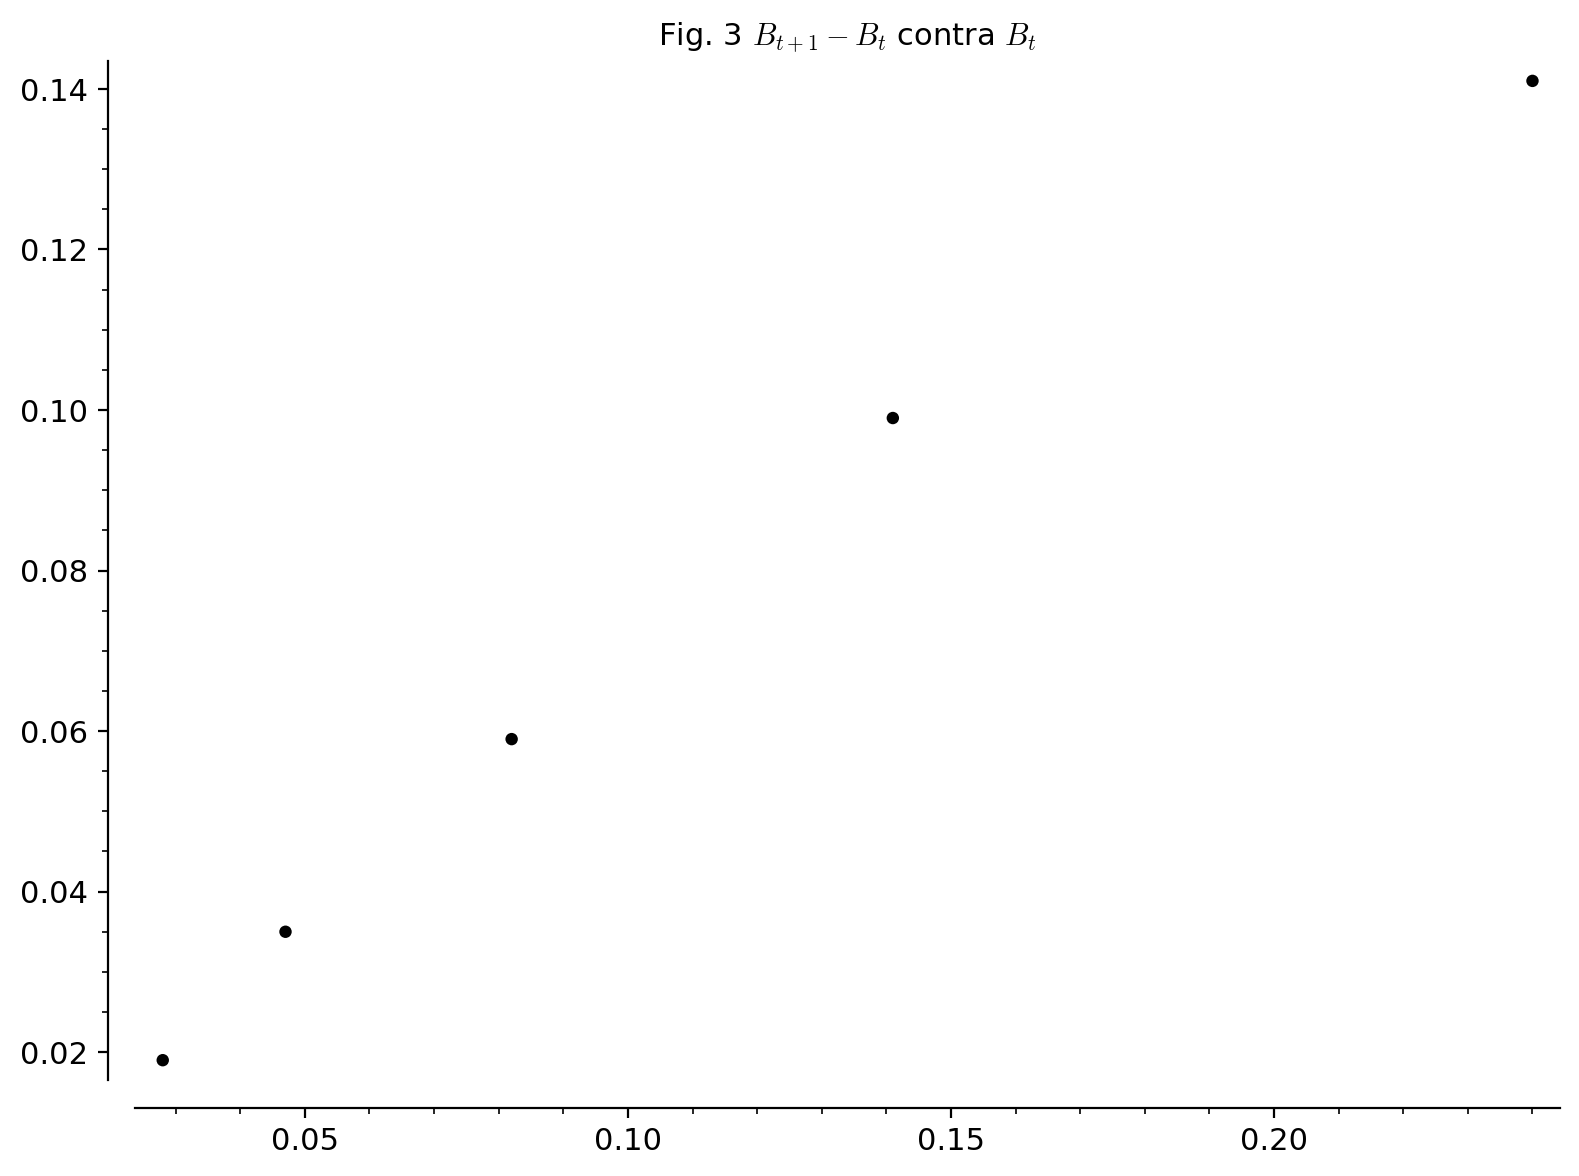

In [729]:
# !! Variable Global: Tabla3 !!
Tabla3 = list()
for t in range(5):
    Tabla3.append( (Tabla1[t][1], Tabla2[t][1]) )
    
MostrarGraficaTabla(Tabla3, nombre="Fig. 3 $B_{t+1}-B_t$ contra $B_t$")

Se puede observar que estos datos muestran una mejor distribución lineal que los de la figura 1 o 2.

#### Ecuación Dinámica
Por ahora usaremos $\hat B_t$ para referirnos a la aproximación del valor $B_t$ dado por un modelo lineal. $k$ se refiere a cualquier pendiente de la recta de este modelo (recta que aproxima los datos de la figura 3). De manera que la ecuación de la recta será descrita por una ecuación en terminos de $y = \Delta \hat B_t$ y $x = \hat B_t$, de la forma $y = kx+b$ si $k$ es la pendiente y $b$ es alguna constante real. Es decir

$$\Delta \hat B_t = k \hat B_t +b,$$
o en términos de meramente las densidades
$$\hat B_{t+1} = (1+k)\hat B_t +b.$$

Sea $K = 1+k$, en la ecuación anterior:

$$\hat B_{t+1} = K\hat B_t +b.$$
Luego para $t = n = 1,2,\ldots$
$$
    \hat B_n = K \hat B_{n-1}+b = K \left(K \hat B_{n-2} +b\right)+b = K^2 \hat B_{n-2}+Kb+b = \ldots \\
    = K^n \hat B_0+ b\sum^{n-1}_{j=0}K^j.
$$
Sin embargo para $n=0$ lo anterior nos da la identidad ignorando las igualdades intermedias.
Por lo que también es válido en ese caso usar la última expresión.

Si $K\neq 1$, (que pasa solo cuando $k=0$, y no estamos considerando valores tan bajos)
$$
    \hat B_n = K^n \hat B_0+ b\frac{1-K^n}{1-K}.
$$

Así la solución de la ecuación dinámica de $t$ propuesta al inicio de esta sección es
$$
    \hat B_t = (1+k)^t B_0 +b \frac{(1+k)^t-1}{k} \\
    = (1+k)^t \left(0.028 +\frac{b}{k}\right)-\frac{b}{k}.
$$

Si escogemos $b$ tal que la recta pasa por un punto de los datos $(\hat B_t, \Delta \hat B_t) = (x, y)$ con
$x= B_t, y=\Delta  B_t$; tenemos de la primer ecuación en esta sección que

$$b = y -k x.$$

Por lo que podemos ajustar este modelo solo por el parámetro $k\neq 0$ y escoger algún punto $(x,y)$.

Si la recta pasa por el primer punto estamos asegurando que el modelo es más preciso por lo menos al inicio. Si la hicieramos pasar cerca de un grupo más grande de puntos, tal vez el modelo es más preciso en un intervalo más grande de tiempo, pero tenemos que advertir que el modelo difiere lejos de este intervalo.

### Pendiente
Para $t=0,1,2,3$: La pendiente $m_t$ de la recta que conecta
$(B_t,\Delta B_t)$ con $(B_{t+1}, \Delta B_{t+1})$ es 
$$\frac{\Delta B_{t+1} - \Delta B_t}{B_{t+1} - B_t} = \frac{\Delta B_{t+1}-\Delta B_t}{\Delta B_t}.$$
O lo que es lo mismo $$m_t = \frac{\Delta B_{t+1}}{\Delta B_t}-1.$$

| $t$           | $B_t$ | $\Delta B_t$ | $m_t$  |
|-----          |-------|---------------|--------|
| 0             | 0.028 | 0.019         | 0.842  |
| 1             | 0.047 | 0.035         | 0.686  |
| 2             | 0.082 | 0.059         | 0.678  |
| 3             | 0.141 | 0.099         | 0.424  |
| 4             | 0.240 | 0.141         |        |
| 5             | 0.381 |               |        |
|Promedio Total |

##### Figura 4.  Una tabla de lo que sabemos hasta ahora

Para tomar una buena pendiente $k$ podríamos usar la media ya que da la coincidencia que tres puntos son casi colineales en la figura 3. Por curiosidad usamos el promedio ponderado por una distancia inversa al promedio normal de los datos. Es decir se toma un promedio donde las pendientes anormales tienen menos peso. Qué tánto afecta la distancia se ajusta por el parámetro $p$ en el siguiente código.

In [638]:
# !! Variable Global: lista_m de pendientes de la fig. 4 !!
lista_m = list()
for t in range(len(Tabla3)-1):
        lista_m.append(Tabla3[t+1][1]/Tabla3[t][1]-1)

#promedio ponderado por inverso de distancia promedio (elevado a potencia p)
#cuando mayor sea p, mayor la influencia de la distancia
#cuando p = 0, es simplemente el promedio de pesos iguales
#https://en.wikipedia.org/wiki/Inverse_distance_weighting

# Cuando se usa se imprime una tabla con los pesos que se le pone a cada valor por default
# Los digitos son solo para los datos que se imprimen, no el valor regresado por la función
def promedio_ponderado(conjunto, p, verbose=True, digitos=3, nombre=None):
    promedio = mean(conjunto)
    if verbose:
        print(nombre)
        print("Valor\tPeso")

    n = len(conjunto)
    suma_pesos = 0
    suma_valor_peso = 0

    for valor in conjunto:
        if abs(valor - promedio) == 0: return valor 
        suma_pesos += 1/abs(valor - promedio)**p
        suma_valor_peso += valor/abs(valor - promedio)**p
        if verbose:
            print(round(valor, digitos), "\t\t", round(1/abs(valor - promedio)**p, digitos))
            
    return suma_valor_peso/suma_pesos

#### Grafica de Soluciones

Ahora vemos gráficamente qué pendientes $k$ y puntos $(\hat B_t, \Delta \hat  B_t) = (x,y)$
(o valor de $b$) se ajustan mejor a los datos.
Ya que solo necesitamos ajustar $b$ cuando escogemos un punto distinto $(x,y)$,
y depende de $k$, usaremos en el código $b: (x,y,k) \rightarrow x-ky$.

In [867]:
from pandas import DataFrame as df
def TablaRecta(k, b):
    return df(map(lambda t,P: (t, P[0], k*P[0]+b, P[1]), range(len(Tabla3)),Tabla3),
              columns=["$t$", "$\\hat B_t$", "$\\Delta \\hat B_t$", "$\\Delta B_t$"])

def TablaDensidad(k, b):
    return df(map(lambda P: (P[0], k*P[0]+b, P[1]), Tabla1),
              columns=["$t$", "$\\hat B_t$", "$B_t$"])

def mostrarGraficaRecta(k, b, titulo):
    var('t')
    GraficaCambio = plot(k*t+b, # <- EC RECTA
                          # t de 0 a max{x: (x,y) en Tabla3}*1.1
                         (t,0,max(map(lambda P: P[0], Tabla3))*1.1),
                         legend_label=
                         "$\\Delta \\hat B_t = "+str(round(k, 3))+"\\hat B_t+("+str(round(b,5))+")$")
    GraficaCambio.set_legend_options(font_size=11)
    
    show(GraficaCambio+GraficaTabla(tabla=Tabla3, label="$\\Delta B_t$", pointsize=10),
         title=titulo,
         figsize=8, fontsize=11, ticks=[0.05,None], axes_labels=['$B_t$',None], dpi=200)
    return TablaRecta(k, b)

SolucionDensidad = lambda k,b: (1+k)^t *(0.028+b/k)-b/k
def mostrarGraficaDensidad(k, b, titulo):
    var('t')
    GraficaDensidad = plot(SolucionDensidad(k, b), # <- MODELO
                           (t, 0, max(map(lambda P: P[0], Tabla1))*1.1),
                           legend_label=
                           "$\\hat B_t ="+
                           str(round(1+k, 3))+
                           "^t\\cdot("+str(round(0.028+b/k, 5))+
                           ")-("+str(round(b/k,5))+")$")
    GraficaDensidad.set_legend_options(font_size=11)
    
    show(GraficaDensidad+GraficaTabla(Tabla1, label="$B_t$", pointsize=10),
         title=titulo,
         figsize=8, fontsize=11, axes_labels=['$t$',None], dpi=200)
    return TablaDensidad(k, b)

Pendiente promedio
Valor	Peso
0.842 		 29.346
0.686 		 1256.834
0.678 		 2389.063
0.424 		 18.378


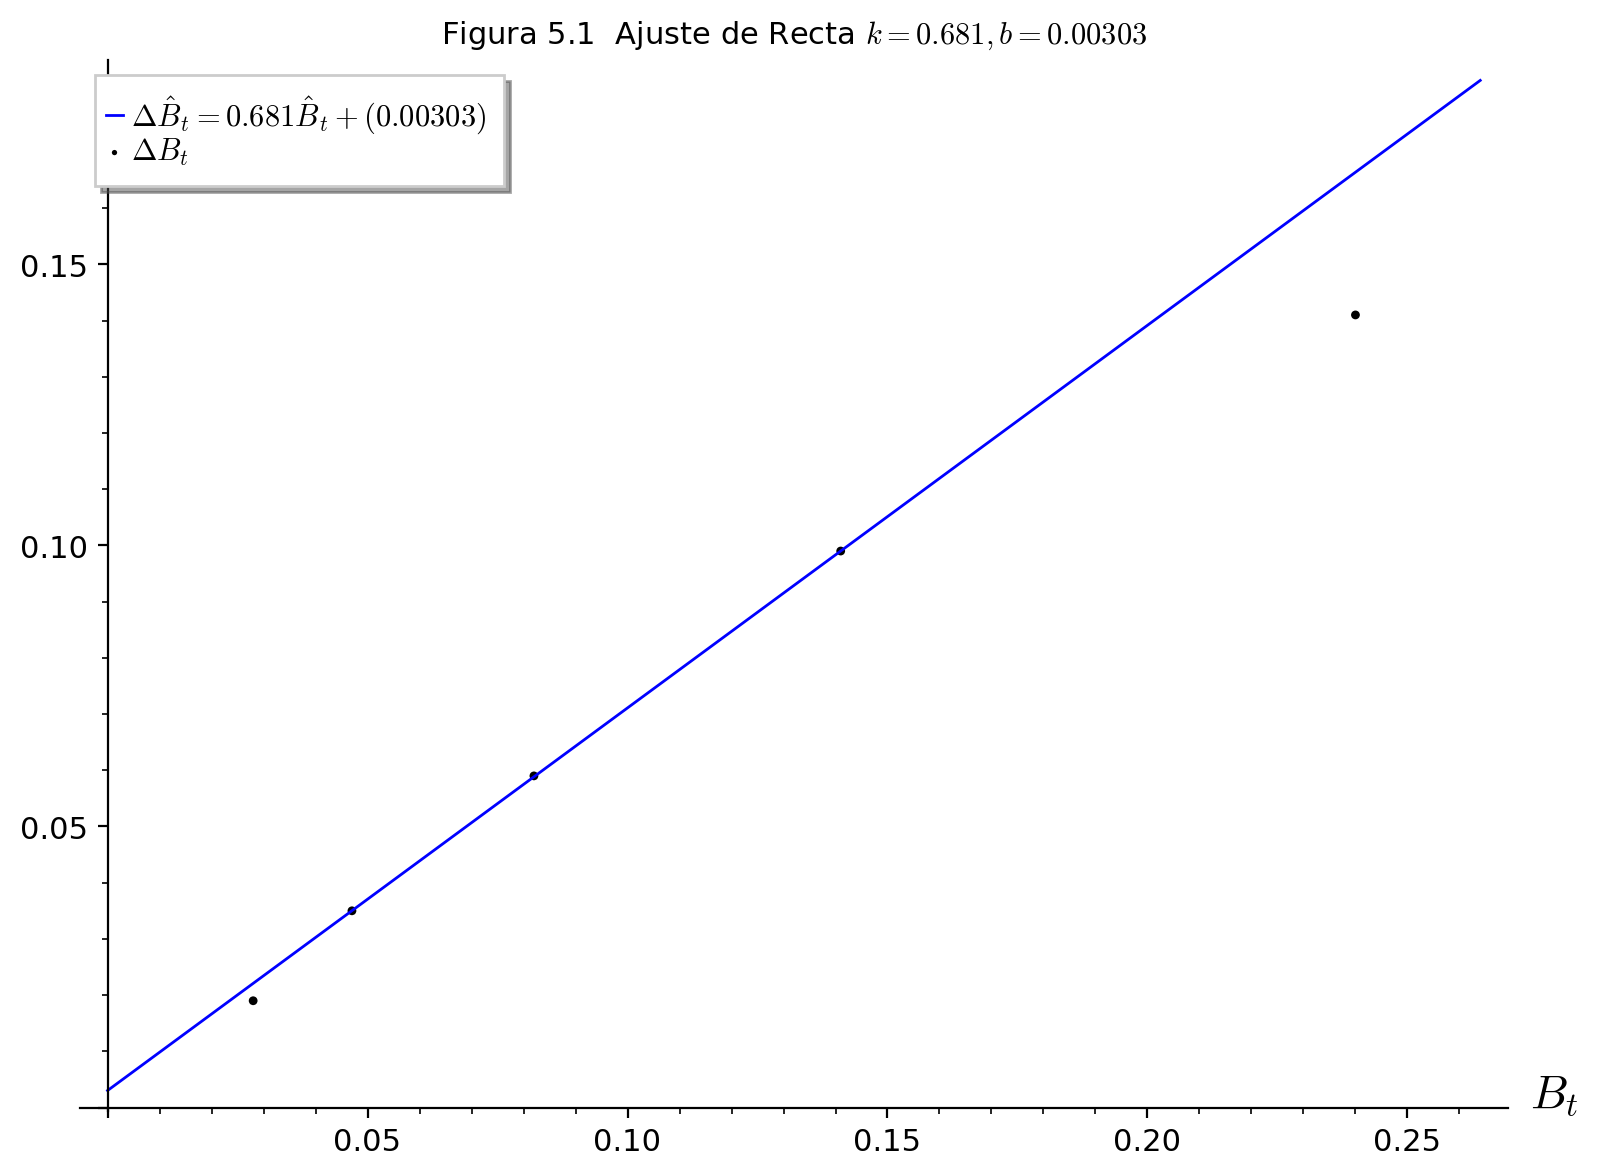

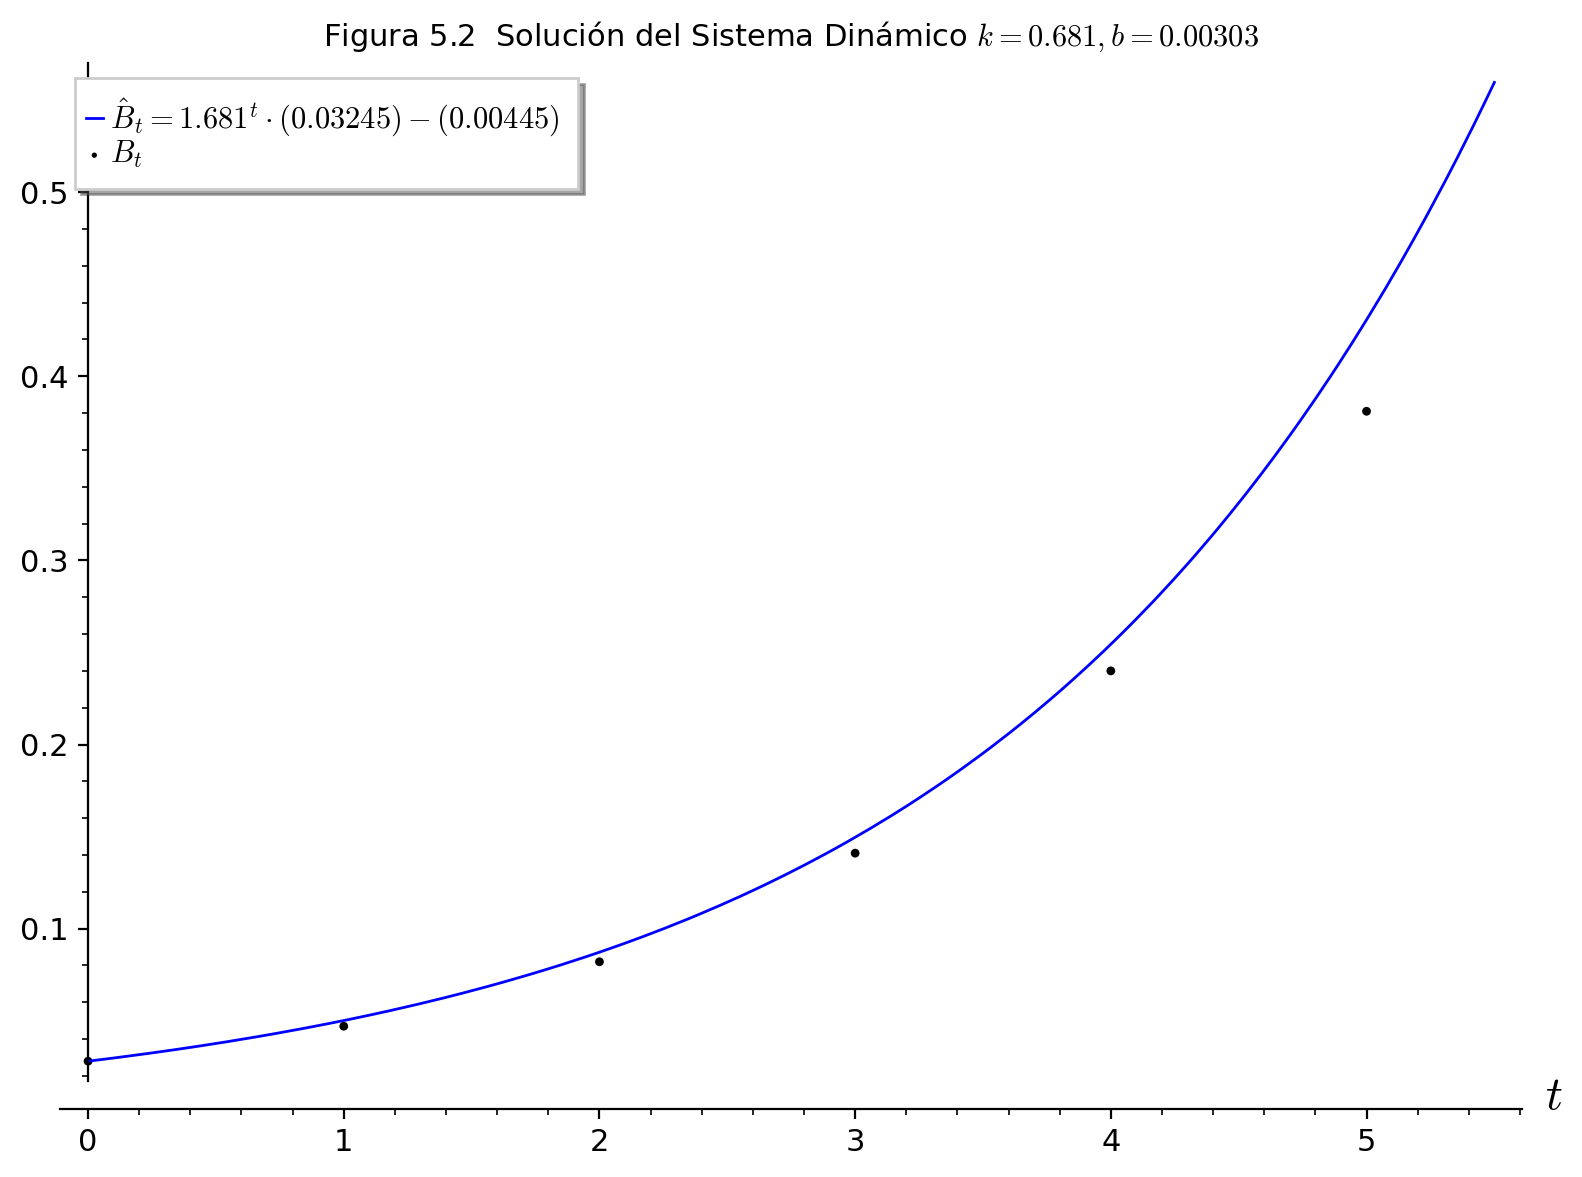

|   $t$ |   $\hat B_t$ |   $\Delta \hat B_t$ |   $\Delta B_t$ |
|------:|-------------:|--------------------:|---------------:|
|     0 |        0.028 |           0.0220872 |          0.019 |
|     1 |        0.047 |           0.0350194 |          0.035 |
|     2 |        0.082 |           0.058842  |          0.059 |
|     3 |        0.141 |           0.099     |          0.099 |
|     4 |        0.24  |           0.166384  |          0.141 |
|   $t$ |   $\hat B_t$ |   $B_t$ |
|------:|-------------:|--------:|
|     0 |   0.00302916 |   0.028 |
|     1 |   0.683673   |   0.047 |
|     2 |   1.36432    |   0.082 |
|     3 |   2.04496    |   0.141 |
|     4 |   2.72561    |   0.24  |
|     5 |   3.40625    |   0.381 |


In [868]:
def b(P, k): # P = (x,y) donde P es un punto de la Tabla3 (datos de Fig.3)
    return P[1] - k*P[0] # y -kx

def Graficas(P, k, n_fig, ajuste_b=1):
    Tabla1 = mostrarGraficaRecta(k, b(P,k)*ajuste_b,
                        "Figura "+str(n_fig)+".1  "+
                        "Ajuste de Recta $k="+str(round(k, 3))+",b="+str(round(b(P,k)*ajuste_b,5))+"$")
    Tabla2 = mostrarGraficaDensidad(k, b(P, k)*ajuste_b,
                           "Figura "+str(n_fig)+".2  "+
                           "Solución del Sistema Dinámico $k="+str(round(k, 3))+
                           ",b="+str(round(b(P,k)*ajuste_b,5))+"$")
    return Tabla1,Tabla2
    
#        Punto         k               pendientes  p                              n_fig
Tablas5_1 = Graficas(Tabla3[3], promedio_ponderado(lista_m[:], 2, nombre="Pendiente promedio"), 5)

for tabla in Tablas5_1:
    print(tabla.to_markdown(index=False))

|   $t$ |   $\hat B_t$ |   $\Delta \hat B_t$ |   $\Delta B_t$ |
|------:|-------------:|--------------------:|---------------:|
|     0 |        0.028 |           0.0220872 |          0.019 |
|     1 |        0.047 |           0.0350194 |          0.035 |
|     2 |        0.082 |           0.058842  |          0.059 |
|     3 |        0.141 |           0.099     |          0.099 |
|     4 |        0.24  |           0.166384  |          0.141 |

|   $t$ |   $\hat B_t$ |   $B_t$ |
|------:|-------------:|--------:|
|     0 |   0.00302916 |   0.028 |
|     1 |   0.683673   |   0.047 |
|     2 |   1.36432    |   0.082 |
|     3 |   2.04496    |   0.141 |
|     4 |   2.72561    |   0.24  |
|     5 |   3.40625    |   0.381 |

En la figura 5, interceptamos la recta con el punto $(B_3, \Delta B_3)$. Se puede ver que todos los puntos son sobrestimados en la figura 5.2; probablemente porque en la fig. 5.1 el primer punto es sobrestimado y luego se mantiene similar el aumento predecido al capturado, a excepción del último punto donde se sobrestima.

None
Valor	Peso
0.842 		 29.346
0.686 		 1256.834
0.678 		 2389.063
0.424 		 18.378


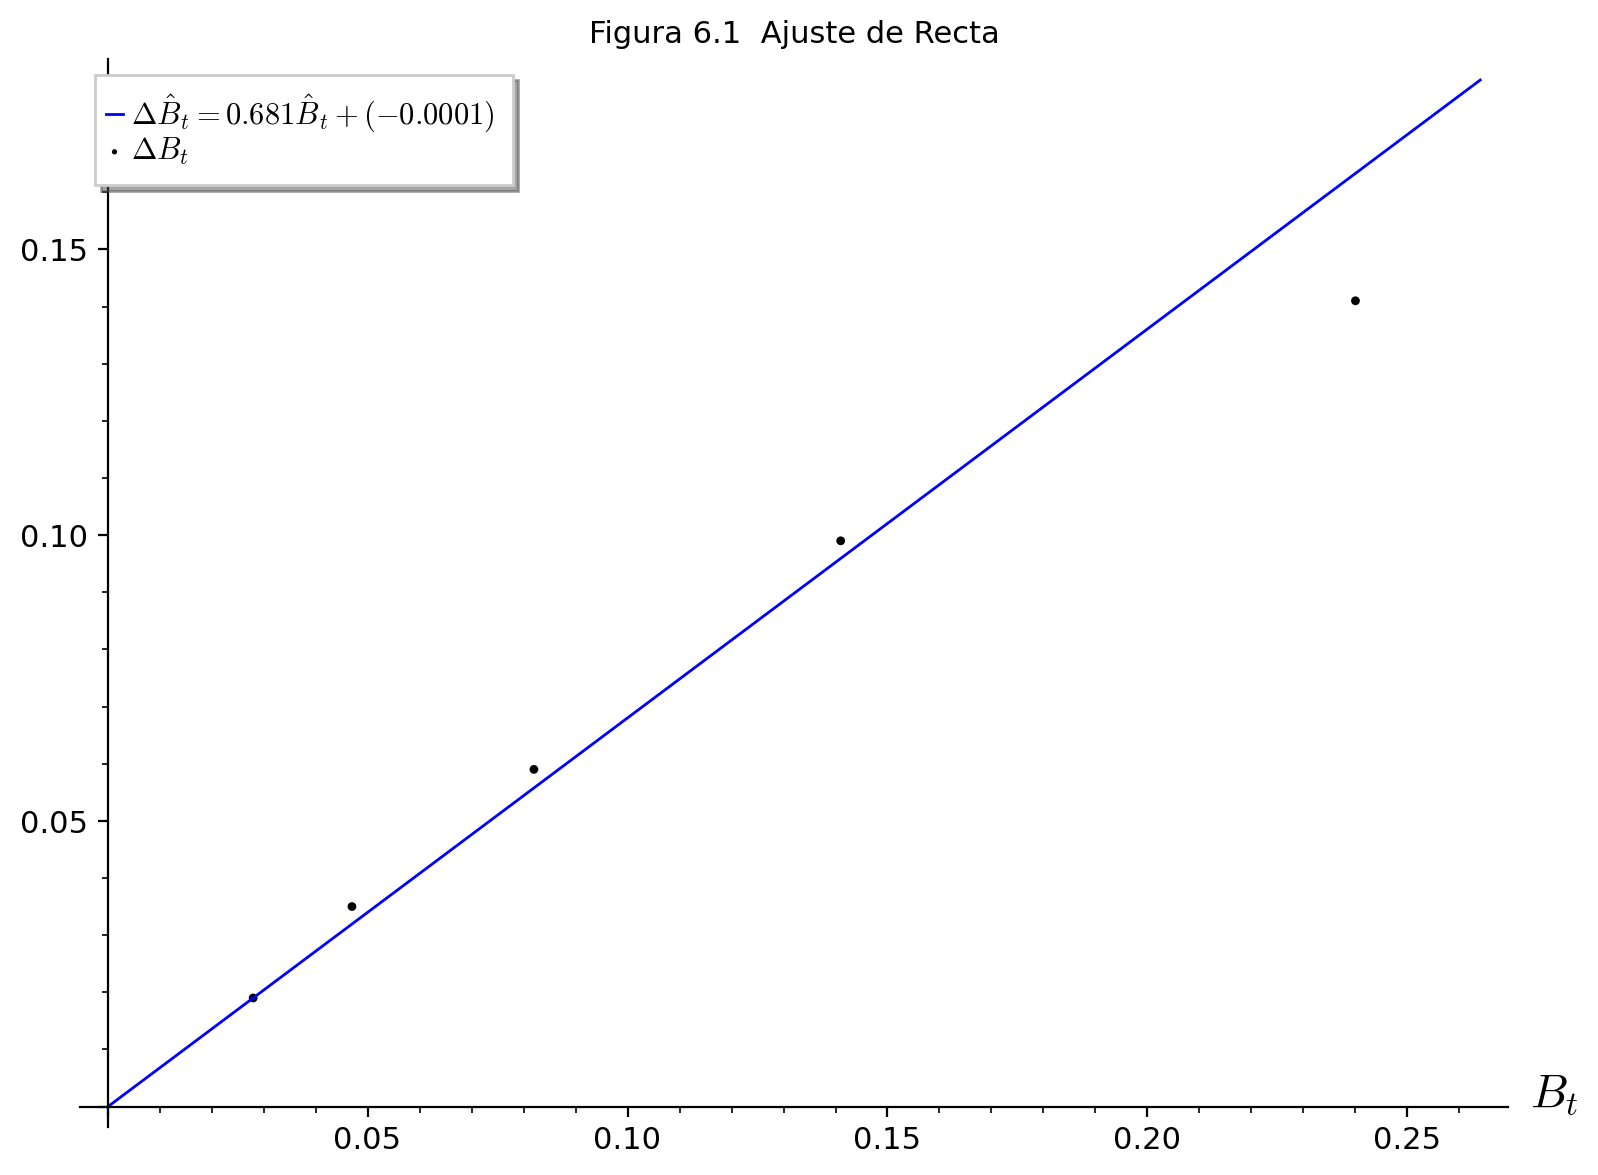

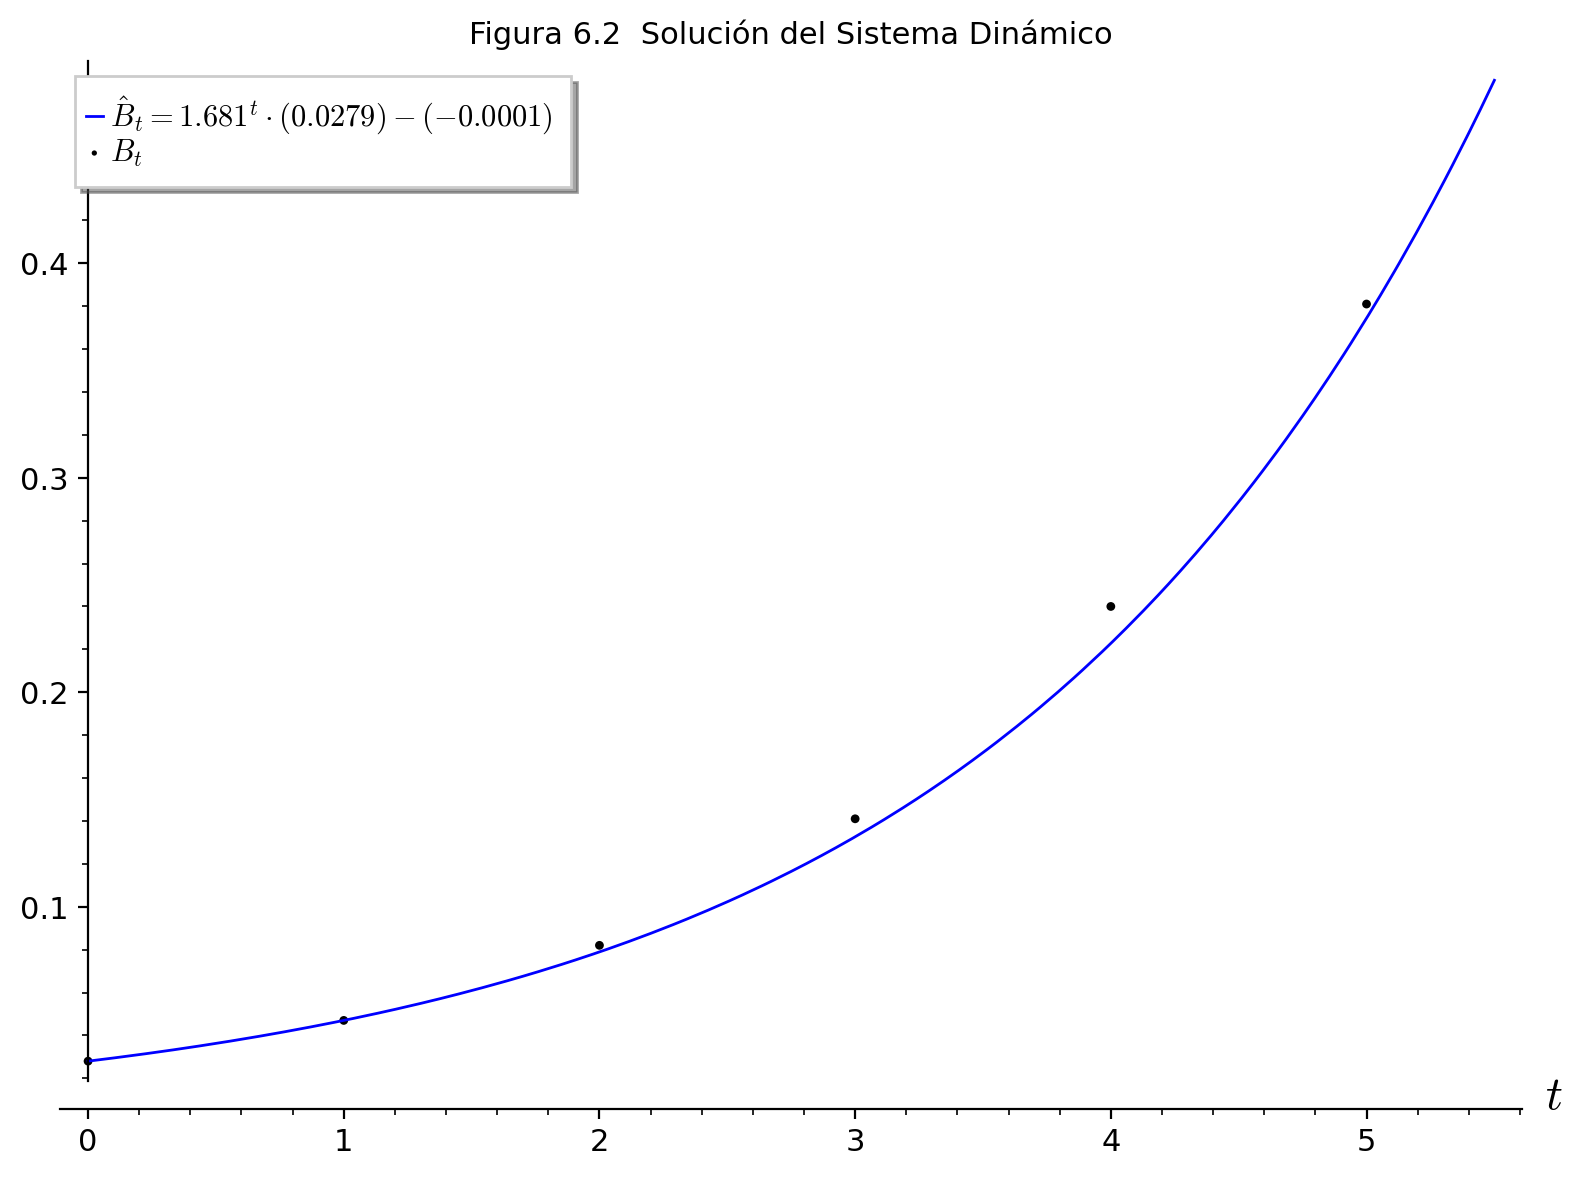

In [779]:
Graficas(Tabla3[0], promedio_ponderado(lista_m[:], 2), 6)

Si se intercepta con el primer punto, tenemos subestimación. Por lo que se prueba aumentar un poco el valor de $b$.

None
Valor	Peso
0.842 		 29.346
0.686 		 1256.834
0.678 		 2389.063
0.424 		 18.378


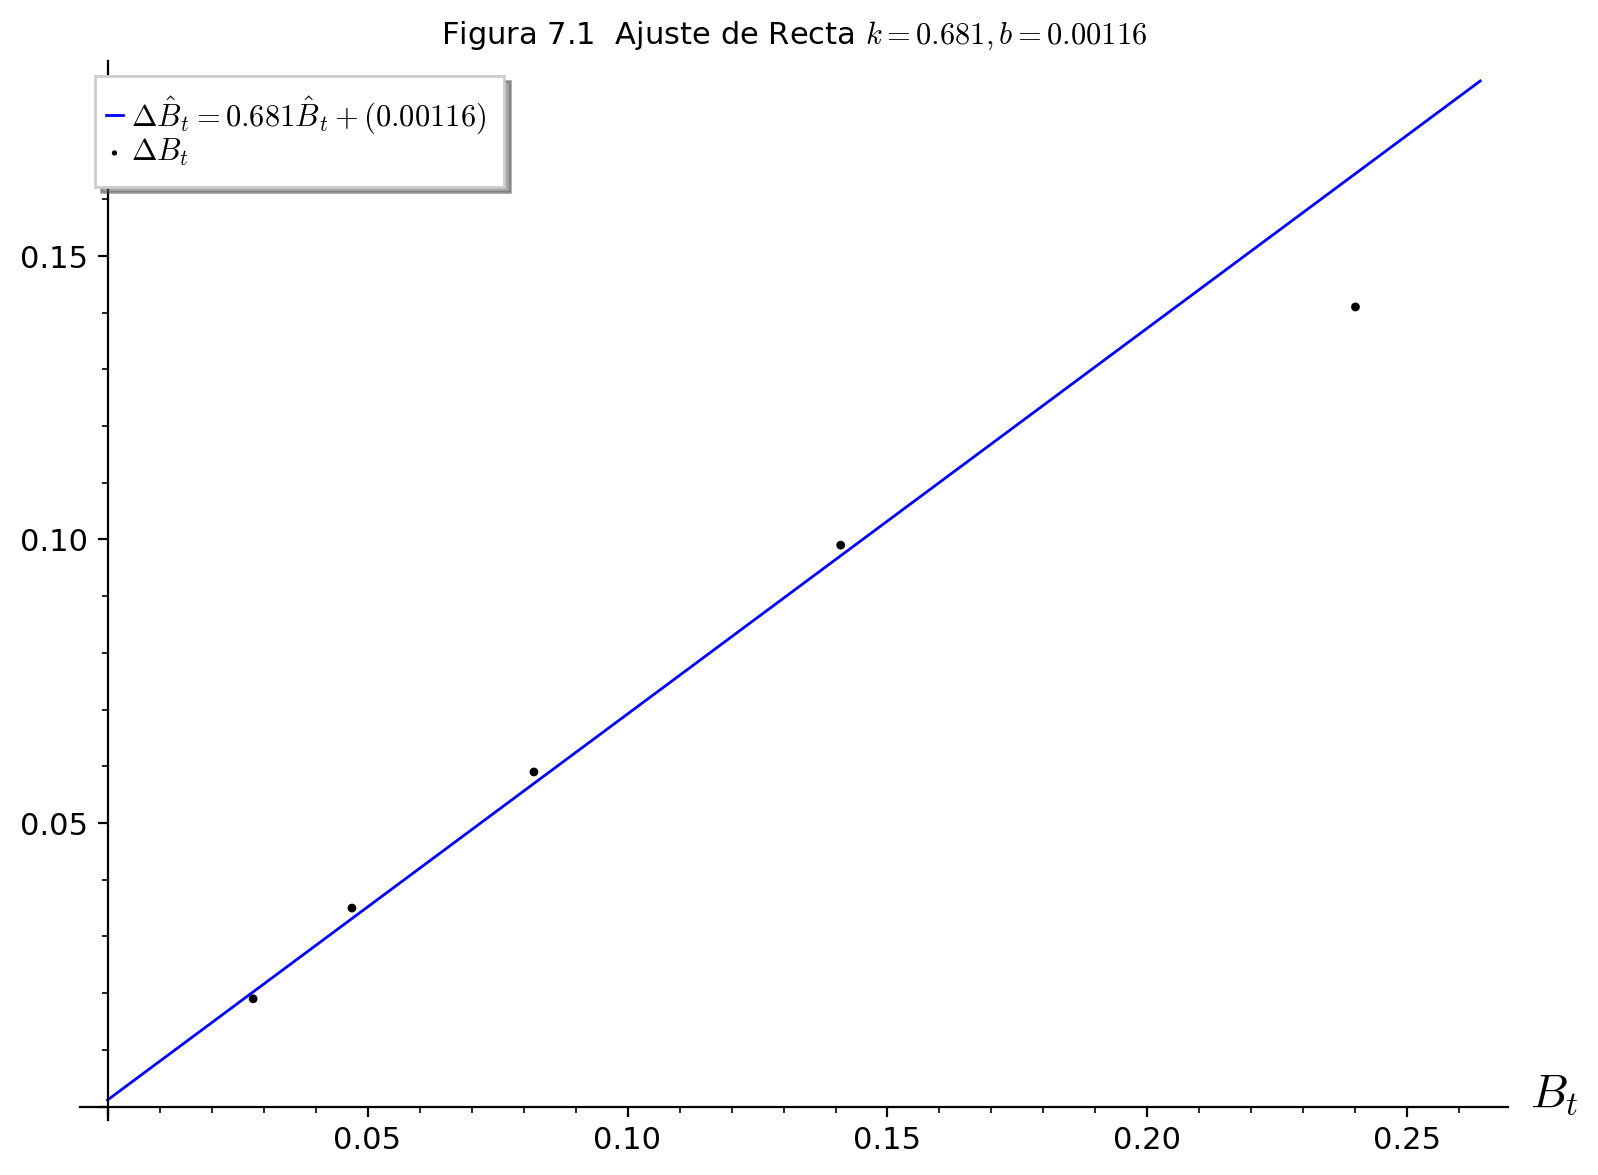

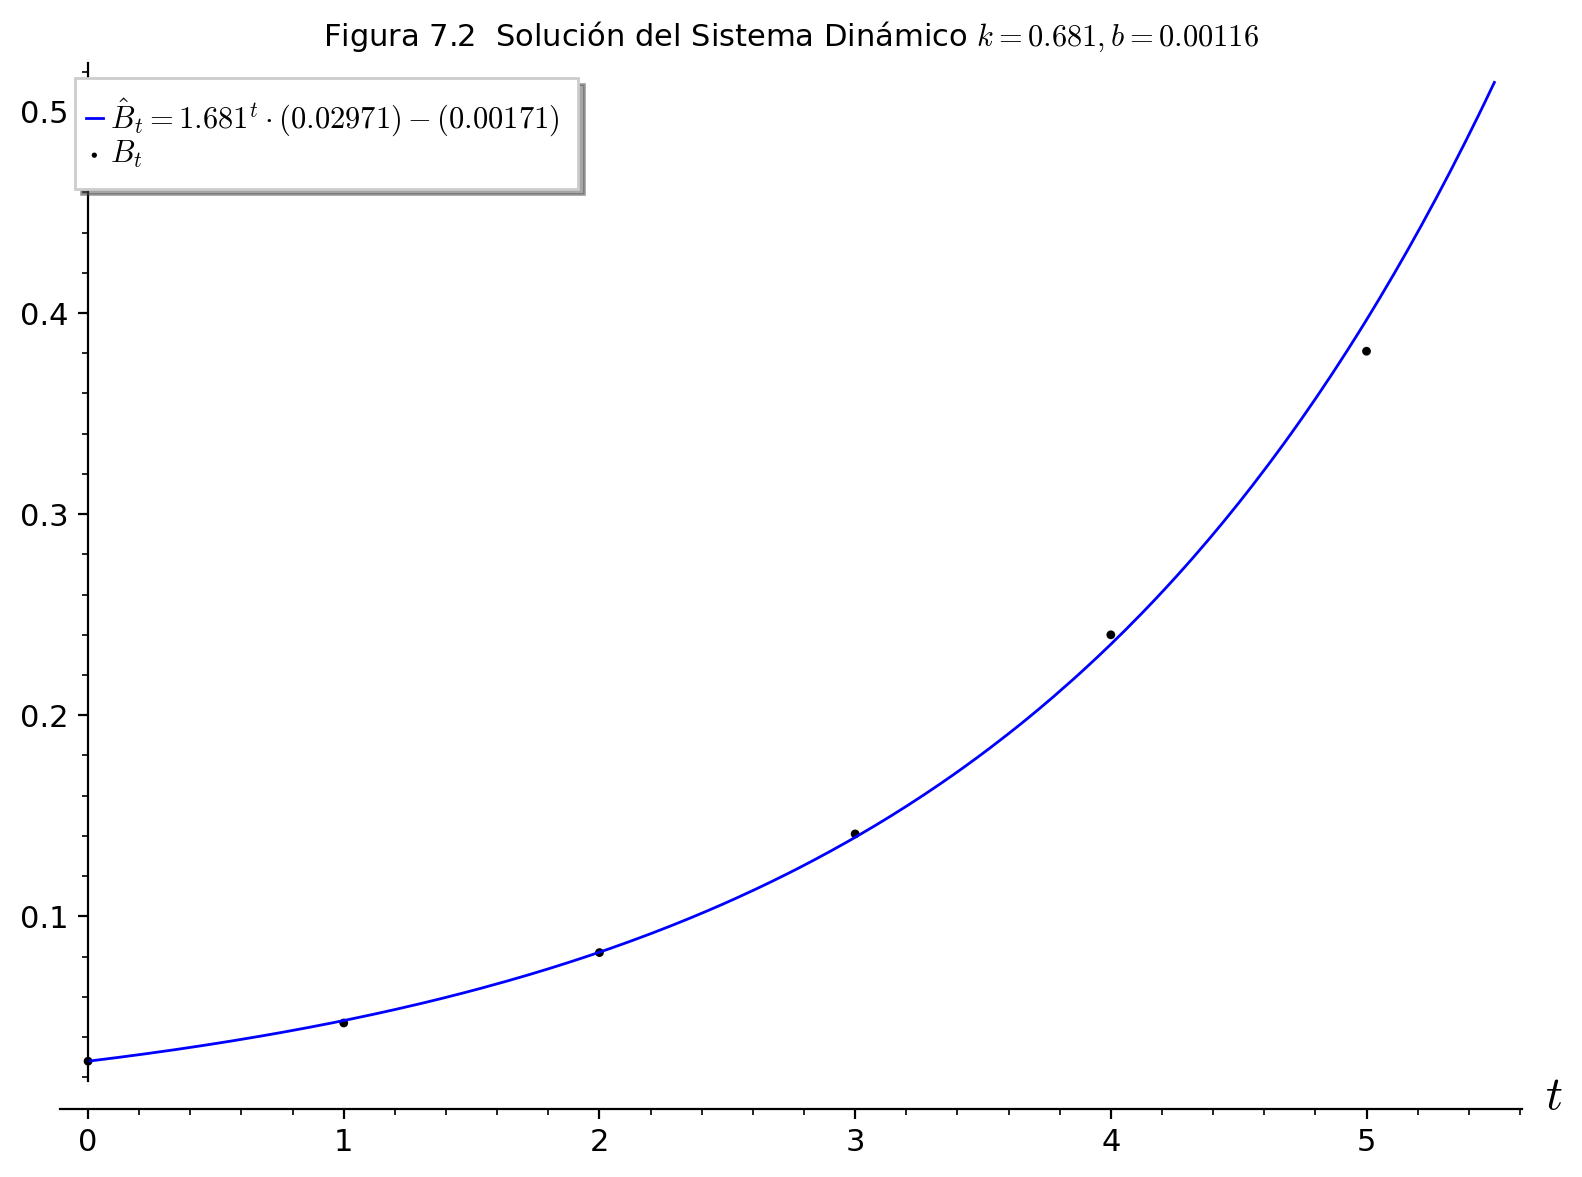

|   $t$ |   $\hat B_t$ |   $\Delta \hat B_t$ |   $\Delta B_t$ |
|------:|-------------:|--------------------:|---------------:|
|     0 |        0.028 |           0.0202188 |          0.019 |
|     1 |        0.047 |           0.033151  |          0.035 |
|     2 |        0.082 |           0.0569736 |          0.059 |
|     3 |        0.141 |           0.0971316 |          0.099 |
|     4 |        0.24  |           0.164515  |          0.141 |

|   $t$ |   $\hat B_t$ |   $B_t$ |
|------:|-------------:|--------:|
|     0 |   0.00116077 |   0.028 |
|     1 |   0.681805   |   0.047 |
|     2 |   1.36245    |   0.082 |
|     3 |   2.04309    |   0.141 |
|     4 |   2.72374    |   0.24  |
|     5 |   3.40438    |   0.381 |



In [872]:
for tabla in Graficas(Tabla3[0], promedio_ponderado(lista_m[:], 2), 7, ajuste_b=-20):
    print(tabla.to_markdown(index = False)); print()

|   $t$ |   $\hat B_t$ |   $\Delta \hat B_t$ |   $\Delta B_t$ |
|------:|-------------:|--------------------:|---------------:|
|     0 |        0.028 |           0.0202188 |          0.019 |
|     1 |        0.047 |           0.033151  |          0.035 |
|     2 |        0.082 |           0.0569736 |          0.059 |
|     3 |        0.141 |           0.0971316 |          0.099 |
|     4 |        0.24  |           0.164515  |          0.141 |

|   $t$ |   $\hat B_t$ |   $B_t$ |
|------:|-------------:|--------:|
|     0 |   0.00116077 |   0.028 |
|     1 |   0.681805   |   0.047 |
|     2 |   1.36245    |   0.082 |
|     3 |   2.04309    |   0.141 |
|     4 |   2.72374    |   0.24  |
|     5 |   3.40438    |   0.381 |

None
Valor	Peso
0.842 		 87.6
0.686 		 407.338
0.678 		 304.617


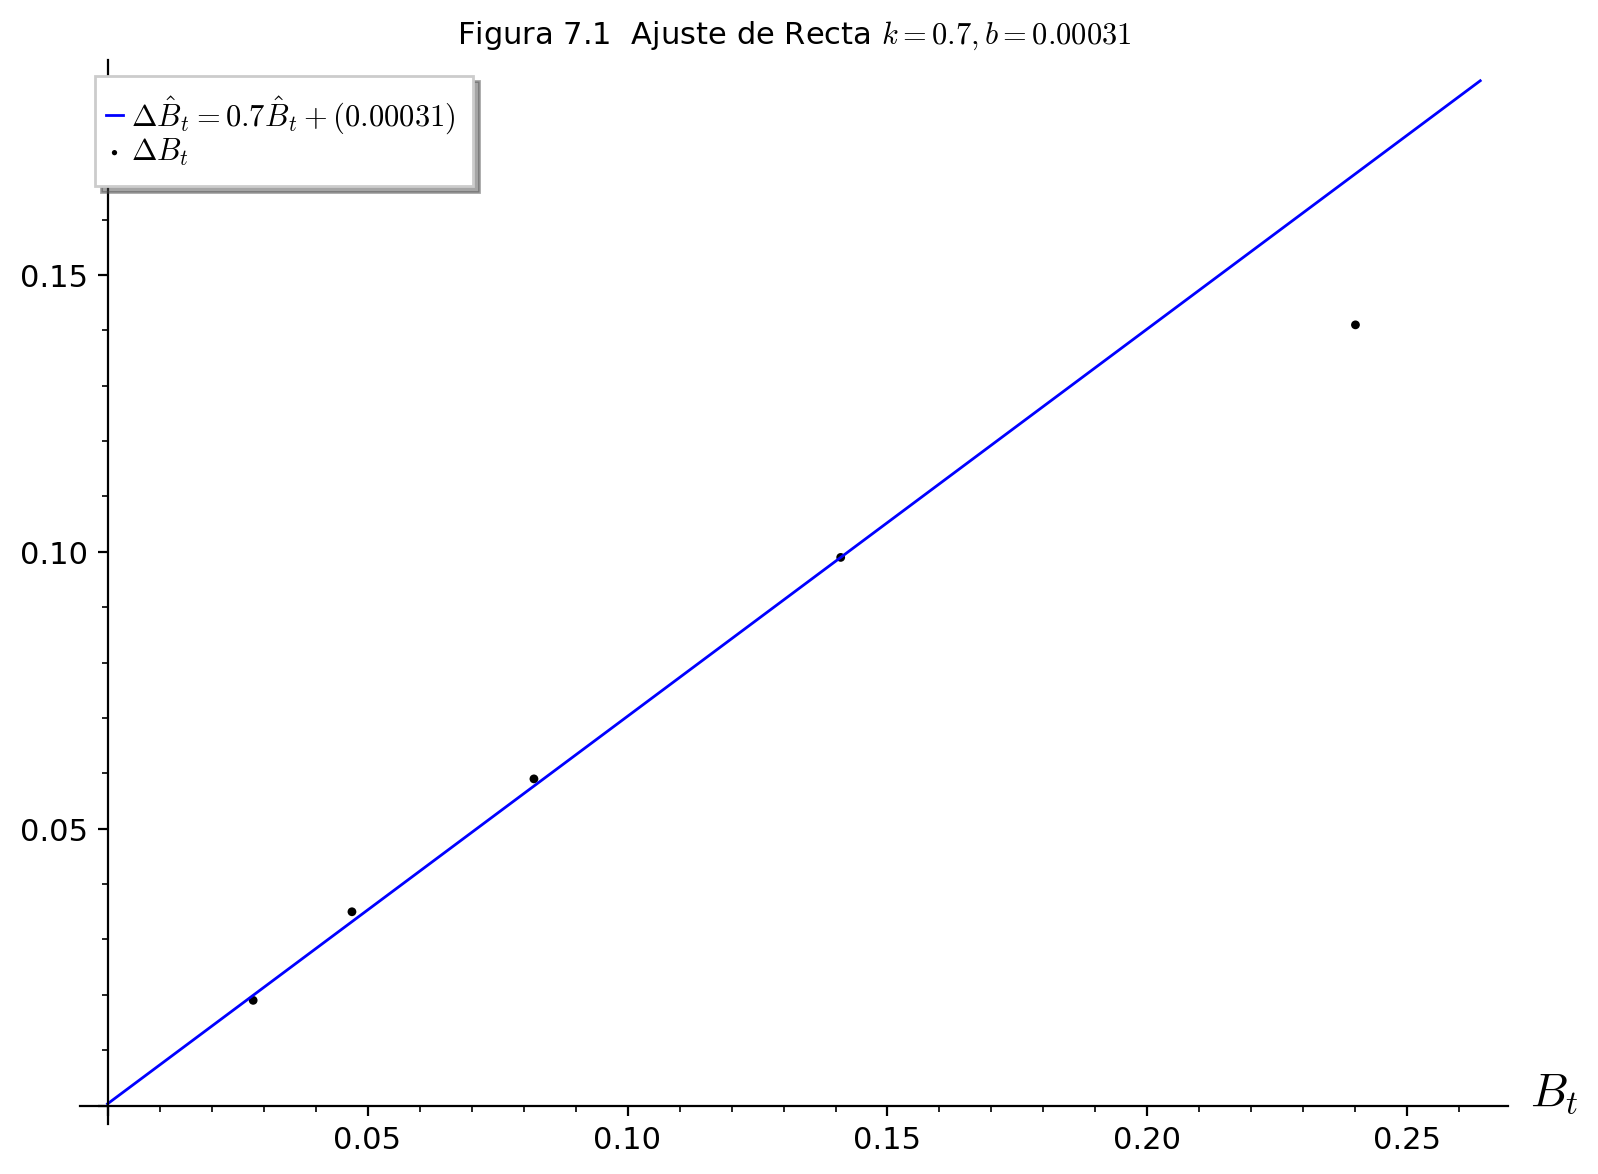

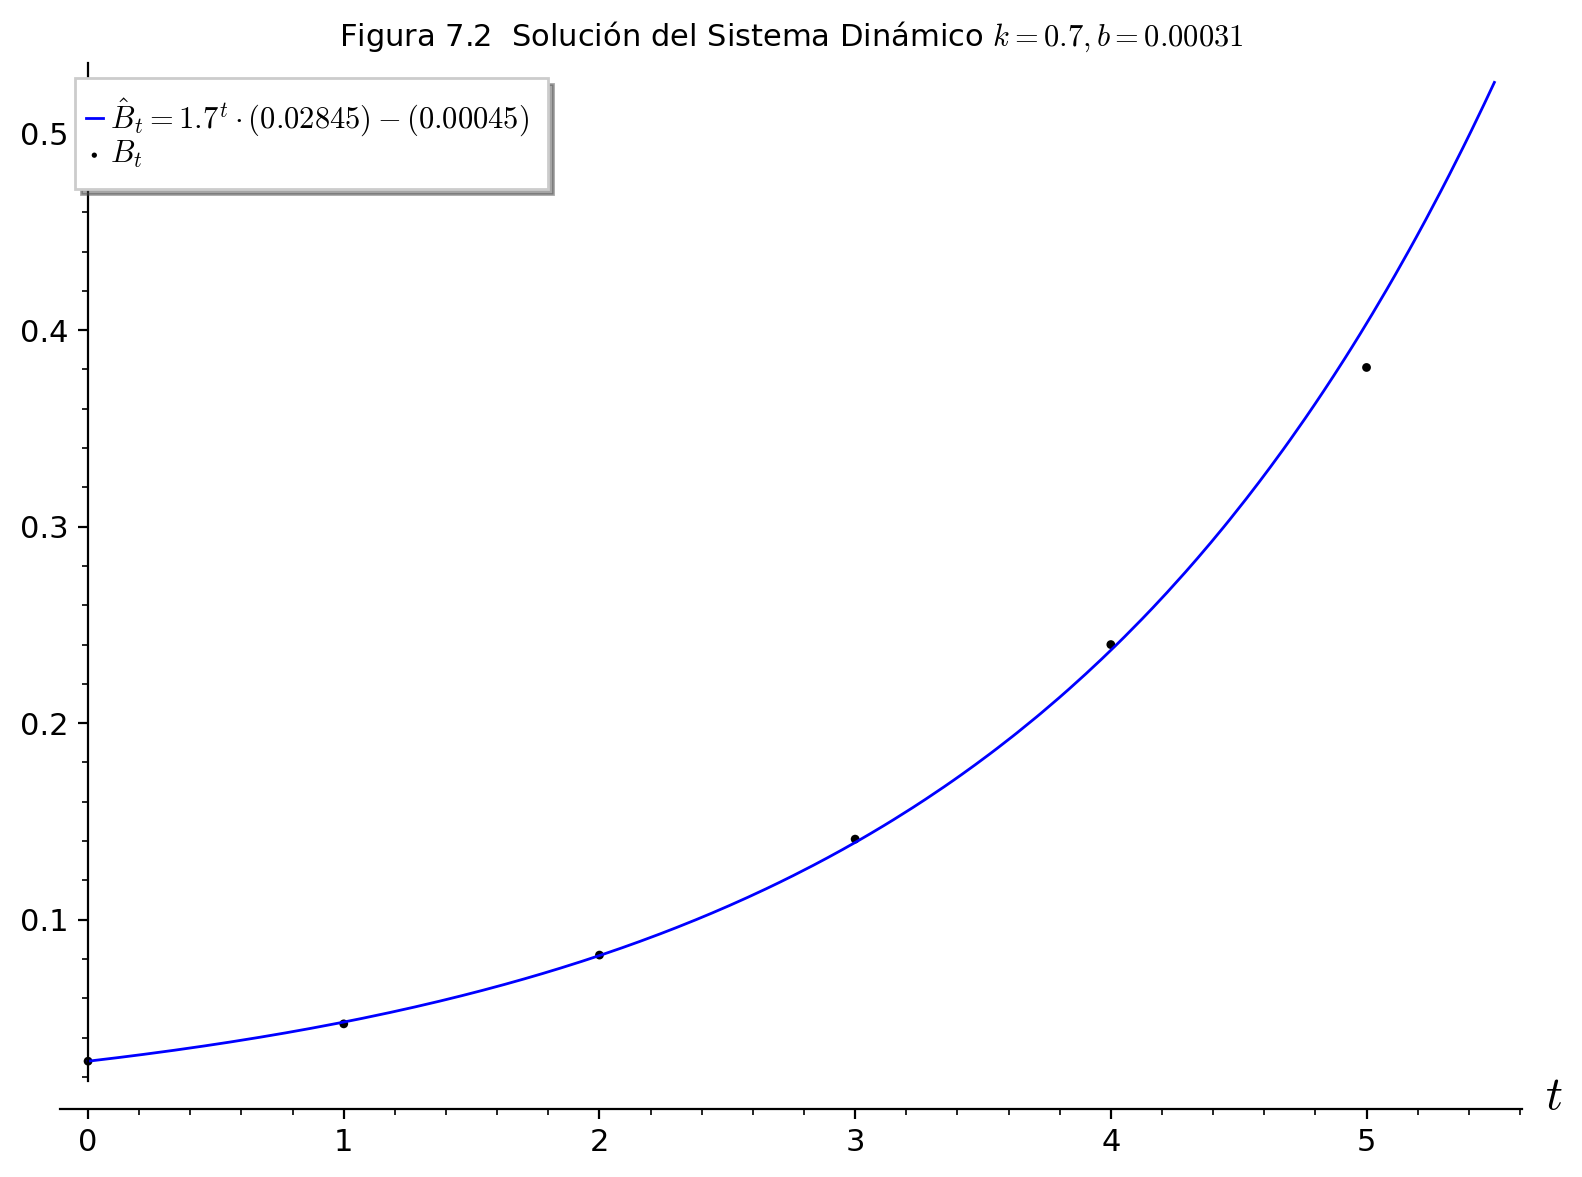

|   $t$ |   $\hat B_t$ |   $\Delta \hat B_t$ |   $\Delta B_t$ |
|------:|-------------:|--------------------:|---------------:|
|     0 |        0.028 |           0.0199117 |          0.019 |
|     1 |        0.047 |           0.0332097 |          0.035 |
|     2 |        0.082 |           0.0577061 |          0.059 |
|     3 |        0.141 |           0.099     |          0.099 |
|     4 |        0.24  |           0.16829   |          0.141 |

|   $t$ |   $\hat B_t$ |   $B_t$ |
|------:|-------------:|--------:|
|     0 |  0.000314563 |   0.028 |
|     1 |  0.700211    |   0.047 |
|     2 |  1.40011     |   0.082 |
|     3 |  2.1         |   0.141 |
|     4 |  2.7999      |   0.24  |
|     5 |  3.4998      |   0.381 |



In [874]:
for tabla in Graficas(Tabla3[3], promedio_ponderado(lista_m[:-1], 2), 7):
    print(tabla.to_markdown(index = False)); print()